*********************************
## ASSIGNMENT 2
### REINFORCEMENT LEARNING
*********************************

*********************************
### Abstract
I have used FrozenLake environment to demonstrate the Reinforcement Learning. We would be using different hyper-parameters to get the average number of steps and rewards. 
*********************************
### Import The Libraires

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import statistics
from IPython.display import Image

### Choose environment from gym 

In [2]:
env = gym.make("FrozenLake-v0")

In [27]:
# Number of rows = size of state space
# Number of columns = size of action space
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

### There are 4 actions for FrozenLake-v0

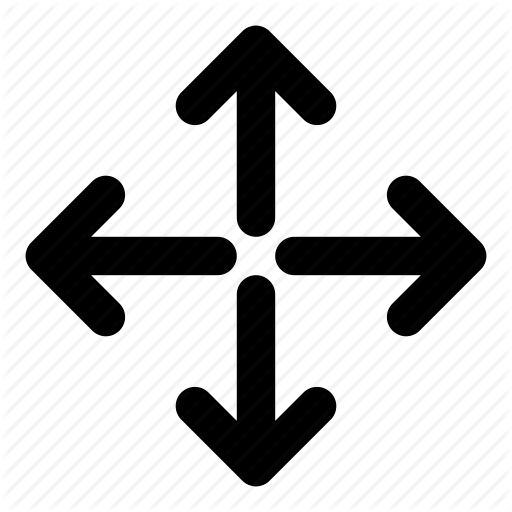

In [28]:
Image(filename='arrow-9-512.png',width=200, height=200)

### Initialize q-table with all zeroes

In [30]:
q_table = np.zeros((state_space_size,action_space_size))

In [31]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


*********************************
## BASELINE MODEL
*********************************

### Initialize baseline model's parameters

In [23]:
num_episodes = 5000 
max_steps_per_episode = 100
learning_rate = 0.7 # alpha
discount_rate = 0.8 # gamma
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01
rewards_all_episodes = []

In [24]:
#env.render()

for episode in range(num_episodes):
    state = env.reset()
    
    done = False # Just keep tracks of whether or not the episode has finished
    rewards_current_episode = 0 # Since we start with 0 as rewards for any new episode
    
    for step in range(max_steps_per_episode):
        #Exploration - Exploitation Tradeoff
        
        exploration_rate_threshold = random.uniform(0,1)
        if(exploration_rate_threshold>exploration_rate):
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state,reward,done,info = env.step(action)

        #print(new_state, done, reward)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break
        
        # Exploration rate decay

    #episode +=1
    exploration_rate = min_exploration_rate + \
                                        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)




In [25]:

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.20200000000000015
2000 :  0.2880000000000002
3000 :  0.3730000000000003
4000 :  0.3770000000000003
5000 :  0.33900000000000025


### Let's see how the agent performs

In [26]:
 # from each state according to the Q-table
steps_in_each_episode = []
for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
         
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
        
        state = new_state
    print("Number Of Steps In This Episode:",step)
    print("Exploration Rate",exploration_rate)
    
    steps_in_each_episode.append(step)
    
env.close()
print("Average Number Of Steps In All Episodes:",statistics.mean(steps_in_each_episode))

Number Of Steps In This Episode: 5
Exploration Rate 0.01
Average Number Of Steps In All Episodes: 21


*********
### Let's check for a new policy function, idea is to check how the agent behaves, I am going to use argmin instead of argmax, I believe the agent will fall into Hole as soon as possible
**********

In [16]:
num_episodes = 5000 
max_steps_per_episode = 100
learning_rate = 0.7 # alpha
discount_rate = 0.8 # gamma
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
rewards_all_episodes = []

In [15]:
#env.render()

for episode in range(num_episodes):
    state = env.reset()
    
    done = False # Just keep tracks of whether or not the episode has finished
    rewards_current_episode = 0 # Since we start with 0 as rewards for any new episode
    
    for step in range(max_steps_per_episode):
        #Exploration - Exploitation Tradeoff
        
        exploration_rate_threshold = random.uniform(0,1)
        if(exploration_rate_threshold>exploration_rate):
            action = np.argmin(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state,reward,done,info = env.step(action)

        #print(new_state, done, reward)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break
        
        # Exploration rate decay

    #episode +=1
    exploration_rate = min_exploration_rate + \
                                        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)


# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
steps_in_each_episode = []
for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        action = np.argmin(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
         
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
        
        state = new_state
    print("Number Of Steps In This Episode:",step)
    
    steps_in_each_episode.append(step)
    
env.close()
print("Average Number Of Steps In All Episodes:",statistics.mean(steps_in_each_episode))    

Number Of Steps In This Episode: 3
Average Number Of Steps In All Episodes: 3.3333333333333335


********************************************
I tried updating the Q-table with custom rewards, whenever the done == False, it means the environment is running and the agent 
has not fallen in a hole. I tried giving it negative rewards, but the total rewards are going way to low in this case. Also, I checked
for state == 15 which means that the agent has reached the Goal and gave it maximum reward, other than this state if the environment is
complete and the state is something else than 15 then it means that the agent has fallen in a hole. I tried giving much negative reward
here. The number of steps to reach the goal decreases in this case but the rewards are quite low.
#####         Update Q-table for Q(s,a)
#####        if done == False:
#####            reward = -0.05
#####        else:
#####            if new_state == 15:
#####                reward = 10.0
#####            else:
#####                reward = -1.0
********************************************
                

In [36]:
#Reset the variables

num_episodes = 10000 
max_steps_per_episode = 100
learning_rate = 0.1 # alpha
discount_rate = 0.99 # gamma
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
rewards_all_episodes = []    

In [37]:
#env.render()

for episode in range(num_episodes):
    state = env.reset()
    
    done = False # Just keep tracks of whether or not the episode has finished
    rewards_current_episode = 0 # Since we start with 0 as rewards for any new episode
    
    for step in range(max_steps_per_episode):
        #Exploration - Exploitation Tradeoff
        
        exploration_rate_threshold = random.uniform(0,1)
        if(exploration_rate_threshold>exploration_rate):
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state,reward,done,info = env.step(action)
        
        if done == False:
            reward = -0.05
        else:
            if new_state == 15:
                reward = 10.0
            else:
                reward = -1.0

        #print(new_state, done, reward)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break
        
        # Exploration rate decay

    #episode +=1
    exploration_rate = min_exploration_rate + \
                                        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)




In [38]:

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  -0.9632499999999955
2000 :  0.21079999999999935
3000 :  2.269600000000002
4000 :  3.3885999999999994
5000 :  4.100700000000008
6000 :  4.302850000000001
7000 :  4.224400000000008
8000 :  4.431850000000003
9000 :  4.261250000000006
10000 :  4.284450000000007


In [39]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
steps_in_each_episode = []
for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
         
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
        
        state = new_state
    print("Number Of Steps In This Episode:",step)
    
    steps_in_each_episode.append(step)
    
env.close()
print("Average Number Of Steps In All Episodes:",statistics.mean(steps_in_each_episode))

  (Down)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
Number Of Steps In This Episode: 10
Average Number Of Steps In All Episodes: 16


*********************
## Establish a baseline performance. How well did your RL Q-learning do on your problem?
Given the baseline model, the agent is falling into the hole for most of the time. While we change some hyperparameters, the performance increases by more than 50%.
*********************

*********************
## What are the states, the actions and the size of the Q-table?
States is the number of tiles in the Frozen Lake environment.
Actions is the actions that can be take, i.e. Up, Down, Left Right.
Size of Q-Table: 16X4
*********************

*********************
## What are the rewards? Why did you choose them?
For Stepping on Empty tile, reward = -0.05
For Stepping on Hole = -1
For Stepping on Goal = 10

I had to choose the Goal reward significantly high otherwise the Total Rewards will lead to only Negatives, as the "G" is farthest from "S". 
*********************

*********************
## How did you choose alpha and gamma in the following equation? 
I tried various values of alpha and gamma
*********************

*********************
## Try a policy other than maxQ(s', a'). How did it change the baseline performance? 


I tried using np.argmin(s',a'). As thought it completely disturbs the baseline performance by making agent move directly to Hole.
*****

*********************
## How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode?

I started with the baseline information given for decay rate and epsilon. I chose a lot lesser value for decay rate which is 0.001. The value of epsilon or exploration rate when reached max steps was 0.01.
*********************

**********
## What is the average number of steps taken per episode?
Average steps taken: 16
Also, the agent never fell into Hole.
**********

****
## Does Q-learning use value-based or policy-based iteration?
Q-learning uses value-based iteration. It is also called off-policy algorithm.
***

***
## What is meant by expected lifetime value in the Bellman equation?
Instead of choosing a state based on immediate reward, agent chooses the next step in such a way that the expected reward at the end of episode is maximum. It is tuned by gamma.
***

***
### Conclusion
We can see that by evaluating the environment and customizing the rewards we get, we are getting far better results than the baseline model
***

***
## References
Bellman Equation Basics for Reinforcement Learning: https://www.youtube.com/watch?v=14BfO5lMiuk

simoninithomas Deep_reinforcement_learning_Course: https://github.com/simoninithomas/Deep_reinforcement_learning_Course

Reinforcement Learning - Introducing Goal Oriented: https://www.youtube.com/watch?v=nyjbcRQ-uQ8&list=PLZbbT5o_s2xoWNVdDudn51XM8lOuZ_Njv

Bellman Equation: https://en.wikipedia.org/wiki/Bellman_equation
***

***
Copyright 2020 Avinash Chourasiya

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
***